In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [20, 5]

In [32]:
dataset = 'amazon'
base_path = r"C:\Users\stezo\Desktop\Praca_magisterska"
if dataset=='imdb':
    file_path = os.path.join(base_path,'Wyniki_IMDb.xlsx')
elif dataset == 'amazon':
    file_path = os.path.join(base_path,'Wyniki_Amazon.xlsx')  

    
df_ridge = pd.read_excel(file_path, sheet_name='Ridge')
df_naive = pd.read_excel(file_path, sheet_name='Naive')
df_svm = pd.read_excel(file_path, sheet_name='SVM')
df_tree = pd.read_excel(file_path, sheet_name='Trees')
df_forest = pd.read_excel(file_path, sheet_name='Forest')
df_rnn = pd.read_excel(file_path, sheet_name='RNN')
df_cnn = pd.read_excel(file_path, sheet_name='CNN')
df_size = pd.read_excel(file_path, sheet_name='Size_test')

In [6]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

# RidgeClassifier

In [7]:
df_ridge

,stage,size of the training set,size of the test set,alpha,accuracy,time
0,alpha,296350,127010,0.01,0.805000,0.90800
1,alpha,296350,127010,0.05,0.870400,0.84700
2,alpha,296350,127010,0.10,0.870200,0.80500
3,alpha,296350,127010,0.20,0.869600,0.80800
4,alpha,296350,127010,0.50,0.866380,0.72700
5,alpha,296350,127010,1.00,0.860700,0.72600
6,alpha,296350,127010,2.00,0.848800,0.66600
7,alpha,296350,127010,5.00,0.813500,0.62100
8,alpha,296350,127010,10.00,0.761696,0.60500
9,alpha,296350,127010,100.00,0.606500,0.53800


In [8]:
df_ridge[df_ridge['accuracy']== max(df_ridge['accuracy'])]

,stage,size of the training set,size of the test set,alpha,accuracy,time
17,size,338690,84680,0.05,0.87955,0.897


In [9]:
ridge_alpha_table = df_ridge[df_ridge['stage'] == 'alpha']
ridge_alpha_table = ridge_alpha_table.loc[:,('alpha','accuracy','time')]
ridge_alpha_table['accuracy'] = ridge_alpha_table['accuracy'] *100

ridge_alpha_table.rename(columns={'alpha': 'Alpha', 
                                  'accuracy': 'Dokładność [%]',
                                  'time':'Czas [s]'},inplace=True)

ridge_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', axis = 0).highlight_min(
                                                                        subset = ['Czas [s]'],
                                                                        color = 'lightgreen', axis = 0).format("{:.4}")

,Alpha,Dokładność [%],Czas [s]
0,0.01,80.5,0.908
1,0.05,87.04,0.847
2,0.1,87.02,0.805
3,0.2,86.96,0.808
4,0.5,86.64,0.727
5,1.0,86.07,0.726
6,2.0,84.88,0.666
7,5.0,81.35,0.621
8,10.0,76.17,0.605
9,100.0,60.65,0.538


In [39]:
filtered = df_ridge[df_ridge['stage'] == 'size']
data = size_filtered.loc[:,('training_size','time_alt')]
#fig, axs = plt.subplots(1,2)  # a figure with a 2x2 grid of Axes
#axs.plot(size_filtered['training_size'],size_filtered['time2'])
#filtered.plot(x='training_size',y='time_alt')

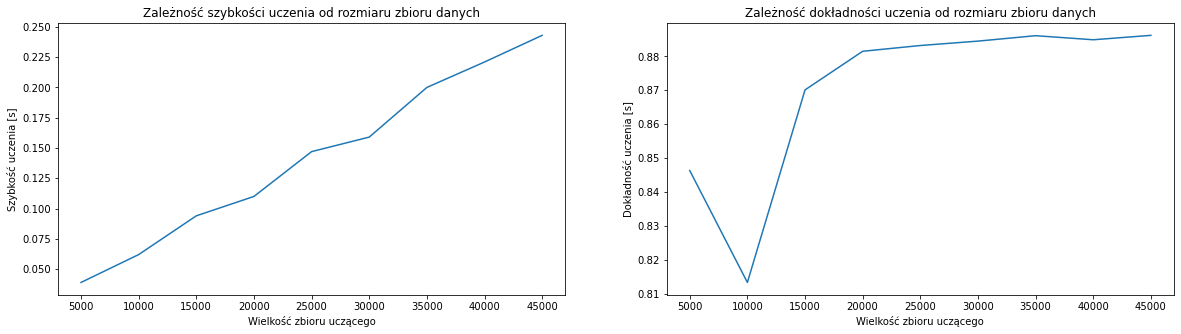

In [63]:
plt.subplot(121)
plt.plot(filtered['training_size'],filtered['time_alt'], label=' training data')
plt.title('Zależność szybkości uczenia od rozmiaru zbioru danych')
plt.ylabel('Szybkość uczenia [s]')
plt.xlabel('Wielkość zbioru uczącego')
#plt.legend(loc="upper left")


plt.subplot(122)
plt.plot(filtered['training_size'],filtered['accuracy'])
plt.title('Zależność dokładności uczenia od rozmiaru zbioru danych')
plt.ylabel('Dokładność uczenia [s]')
plt.xlabel('Wielkość zbioru uczącego')
#plt.legend(loc="upper left")
plt.show()

# Naive Bayes

In [10]:
naive_alpha_table = df_naive[df_naive['stage'] == 'alpha']
naive_alpha_table = naive_alpha_table.loc[:,('alpha','accuracy','time')]
naive_alpha_table['accuracy'] = naive_alpha_table['accuracy'] *100

naive_alpha_table.rename(columns={'alpha': 'Alpha', 
                                  'accuracy': 'Dokładność [%]',
                                  'time':'Czas [s]'},inplace=True)

naive_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', axis = 0).highlight_min(
                                                                        subset = ['Czas [s]'],
                                                                        color = 'lightgreen', axis = 0).format("{:.4}")

,Alpha,Dokładność [%],Czas [s]
0,0.01,82.9,0.0868
1,0.05,83.9,0.085
2,0.1,83.89,0.09
3,0.2,83.8,0.088
4,0.5,83.89,0.0892
5,1.0,83.89,0.084
6,2.0,83.86,0.093
7,5.0,83.85,0.0876
8,10.0,83.74,0.0965
9,100.0,79.34,0.0887


# SVM 

In [11]:
svm_alpha_table = df_svm[df_naive['stage'] == 'alpha']
svm_alpha_table = svm_alpha_table.loc[:,('alpha','accuracy','time')]
svm_alpha_table['accuracy'] = svm_alpha_table['accuracy'] *100
svm_alpha_table['time'] = svm_alpha_table['time'] /60
svm_alpha_table.rename(columns={'alpha': 'Alpha', 
                                  'accuracy': 'Dokładność [%]',
                                  'time':'Czas [min]'},inplace=True)

svm_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', axis = 0).highlight_min(
                                                                        subset = ['Czas [min]'],
                                                                        color = 'lightgreen',
                                                                        axis = 0).format(
                                                                                        "{:.4}")
                                                                                        #subset=['Alpha','Dokładność [%]'])

,Alpha,Dokładność [%],Czas [min]
0,0.01,nan,nan
1,0.05,nan,nan
2,0.1,nan,nan
3,0.2,nan,nan
4,0.5,87.58,189.5
5,1.0,nan,nan
6,2.0,nan,nan
7,5.0,nan,nan
8,10.0,nan,nan
9,100.0,nan,nan


# Decision Trees

In [15]:
tree_alpha_table = df_tree[df_tree['stage'] != 'size']
tree_alpha_table = tree_alpha_table.loc[:,('criterion','splitter','max_features','accuracy','time')]
tree_alpha_table['accuracy'] = tree_alpha_table['accuracy'] *100

tree_alpha_table.rename(columns={'criterion': 'Kryterium podziału',
                                 'splitter' : 'Splitter',
                                 'max_features' : 'Max features',
                                 'accuracy': 'Dokładność [%]',
                                 'time':'Czas [s]'},inplace=True)

tree_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', axis = 0).highlight_min(
                                                                        subset = ['Czas [s]'],
                                                                        color = 'lightgreen', axis = 0).format("{:.4}",
                                                                                                               subset=['Dokładność [%]','Czas [s]'])

,Kryterium podziału,Splitter,Max features,Dokładność [%],Czas [s]
0,gini,best,auto,73.52,26.2
1,entropy,best,auto,73.56,25.2
2,gini,random,auto,72.52,31.1
3,gini,random,sqrt,71.94,33.2
4,gini,random,log2,69.69,19.1
5,entropy,random,log2,69.48,19.2


# Random Forest

In [16]:
forest_alpha_table = df_forest[df_forest['stage'] != 'size']
forest_alpha_table = forest_alpha_table.loc[:,('criterion','max_features','n_estimators','accuracy','time')]
forest_alpha_table['accuracy'] = forest_alpha_table['accuracy'] *100
forest_alpha_table.rename(columns={'criterion': 'Kryterium podziału',
                                 'max_features' : 'Max features',
                                 'n_estimators' : 'Ilośc drzew decyzyjnych',
                                 'accuracy': 'Dokładność [%]',
                                 'time':'Czas [s]'},inplace=True)

forest_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', axis = 0).highlight_min(
                                                                        subset = ['Czas [s]'],
                                                                        color = 'lightgreen', axis = 0).format("{:.5}",
                                                                                                               subset=['Dokładność [%]','Czas [s]'])

,Kryterium podziału,Max features,Ilośc drzew decyzyjnych,Dokładność [%],Czas [s]
0,gini,auto,10,81.429,79.1
1,entropy,auto,10,81.808,74.0
2,gini,sqrt,10,81.76,75.0
3,gini,log2,10,79.857,44.8
4,entropy,log2,10,79.964,43.1
5,entropy,auto,2,72.372,22.1
6,entropy,auto,5,79.54,34.4
7,entropy,auto,20,83.488,149.0
8,entropy,auto,50,84.789,387.0
9,entropy,auto,100,85.205,775.0


# RNN

In [14]:

rnn_alpha_table = df_rnn[df_rnn['stage'] != 'size']
rnn_alpha_table = rnn_alpha_table.loc[:,('embedding','seq_length','dropout','epoch','accuracy','time')]
rnn_alpha_table['accuracy'] = rnn_alpha_table['accuracy'] *100
rnn_alpha_table.rename(columns={'embedding': 'Embedding',
                                'seq_length' : 'Dł. sekwencji',
                                'dropout' : 'Dropout',
                                'epoch' : 'Epoki',
                                'accuracy': 'Dokładność [%]',
                                'time':'Czas [s]'},inplace=True)

rnn_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', 
                                axis = 0).highlight_min(
                                    subset = ['Czas [s]'],
                                    color = 'lightgreen', 
                                    axis = 0).format("{:.4}",
                                        subset=['Dokładność [%]','Czas [s]']).format(
                                            "{:.0f}",
                                            subset = ['Epoki']).format(
                                                "{:.1f}",
                                                subset = ['Dropout'])

,Embedding,Dł. sekwencji,Dropout,Epoki,Dokładność [%],Czas [s]
0,8,100,0.2,20,85.36,82.0
1,16,100,0.2,20,85.69,87.0
2,32,100,0.2,20,85.45,125.0
3,16,200,0.2,20,85.77,143.0
4,16,200,0.4,20,84.45,144.0
5,16,200,0.2,50,86.25,358.0
6,16,200,0.2,100,86.21,961.0


# CNN

In [15]:
cnn_alpha_table = df_cnn[df_cnn['stage'] != 'size']
cnn_alpha_table = cnn_alpha_table.loc[:,('embedding','seq_length','neurons','epoch','accuracy','time')]
cnn_alpha_table['accuracy'] = cnn_alpha_table['accuracy'] *100
cnn_alpha_table.rename(columns={'embedding': 'Embedding',
                                'seq_length' : 'Dł. sekwencji',
                                'neurons' : 'Neurony',
                                'epoch' : 'Epoki',
                                'accuracy': 'Dokładność [%]',
                                'time':'Czas [s]'},inplace=True)

cnn_alpha_table.style.highlight_max(
                                subset = ['Dokładność [%]'], 
                                color = 'lightgreen', 
                                axis = 0).highlight_min(
                                    subset = ['Czas [s]'],
                                    color = 'lightgreen', 
                                    axis = 0).format("{:.4}",
                                        subset=['Dokładność [%]','Czas [s]']).format(
                                            "{:.0f}",
                                            subset = ['Neurony', 'Epoki'])

,Embedding,Dł. sekwencji,Neurony,Epoki,Dokładność [%],Czas [s]
0,8,100,5,20,65.81,41.0
1,16,100,5,20,65.72,43.2
2,32,100,5,20,65.51,42.6
3,16,200,5,20,89.89,57.7
4,16,200,10,20,89.56,70.0
5,16,200,20,20,90.3,70.0
6,16,200,20,50,91.93,173.0
7,16,200,20,100,94.65,283.0


# Size test


In [33]:
size_table = df_size
for col in ['Ridge_a','Naive_a','SVM_a','DT_a','RF_a','RNN_a','CNN_a']:
    size_table[col] = size_table[col].apply(lambda x: x*100)

size_table['SVM_a'] = size_table['SVM_a'].replace({0:np.nan})
size_table['SVM_t'] = size_table['SVM_t'].replace({0:np.nan})

size_table.style.highlight_max(
                         subset = ['Ridge_a','Naive_a','SVM_a','DT_a','RF_a','RNN_a','CNN_a'], 
                         color = 'lightgreen', 
                         axis = 0).format("{:.4}",
                                        subset=df_size.columns[3:])



,stage,training_size,testing_size,Ridge_a,Ridge_t,Naive_a,Naive_t,SVM_a,SVM_t,DT_a,DT_t,RF_a,RF_t,RNN_a,RNN_t,CNN_a,CNN_t
0,size,43000,128000,86.0,0.8512,83.69,0.012,86.47,307.0,72.47,0.963,83.74,11.3,87.58,94.1,90.72,25.0
1,size,85000,128000,86.39,0.242,83.98,0.0257,87.65,1.073e+03,72.2,3.11,84.33,39.5,86.23,138.0,91.02,30.1
2,size,128000,128000,86.65,0.346,83.84,0.041,87.14,2.236e+03,72.78,5.99,84.6,102.0,86.14,178.0,90.23,37.3
3,size,170000,128000,86.97,0.447,83.95,0.048,nan,4.058e+03,72.83,9.71,84.86,205.0,85.7,233.0,89.43,45.8
4,size,212000,128000,86.99,0.566,83.95,0.0698,nan,nan,73.47,19.4,85.15,494.0,85.68,272.0,90.17,54.0
5,size,255000,128000,87.07,0.666,83.89,0.0658,nan,nan,73.08,18.6,85.18,513.0,86.11,313.0,89.99,61.0
6,size,297000,128000,87.04,0.847,83.89,0.084,87.58,1.137e+04,73.56,25.2,85.2,775.0,86.25,358.0,90.3,70.0
7,size,339000,85000,87.96,0.897,83.69,0.11,nan,nan,73.37,30.6,85.06,887.0,86.88,378.0,90.02,71.0
8,size,382000,43000,87.24,0.971,83.91,0.114,nan,nan,74.1,34.6,85.2,1.168e+03,86.37,410.0,90.41,72.0


In [36]:
svm = size_table.loc[:,['training_size','SVM_a','SVM_t']]
svm.dropna(inplace=True)
svm

,training_size,SVM_a,SVM_t
0,43000,86.4652,307.0
1,85000,87.6540,1073.0
2,128000,87.1407,2236.0
6,297000,87.5848,11371.0


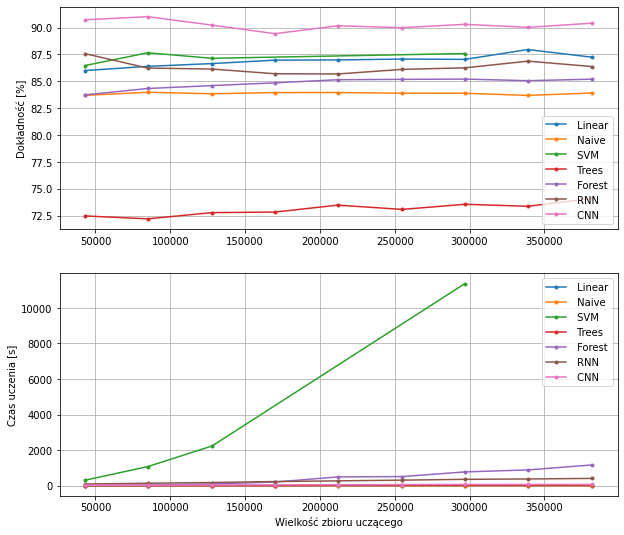

In [40]:
# plot 
plt.rcParams['figure.figsize'] = [10,9 ]

f, axs = plt.subplots(2, 1)
#axs[0].subplot(211)
axs[0].plot(size_table['training_size'],size_table['Ridge_a'], label=' Linear',marker= '.')
axs[0].plot(size_table['training_size'],size_table['Naive_a'], label=' Naive',marker= '.')
axs[0].plot(svm['training_size'],svm['SVM_a'], label=' SVM',marker= '.')
axs[0].plot(size_table['training_size'],size_table['DT_a'], label=' Trees',marker= '.')
axs[0].plot(size_table['training_size'],size_table['RF_a'], label=' Forest',marker= '.')
axs[0].plot(size_table['training_size'],size_table['RNN_a'], label=' RNN',marker= '.')
axs[0].plot(size_table['training_size'],size_table['CNN_a'], label=' CNN',marker= '.')
#axs[0].set_title('Binary accuracy for Text Classification')
axs[0].set_ylabel('Dokładność [%]')
#axs[0].set_xlabel('No. epoch')
axs[0].legend(loc="lower right")
axs[0].grid(True)
#axs[0].set_ylim(80,90)

axs[1].plot(size_table['training_size'],size_table['Ridge_t'], label=' Linear',marker= '.')
axs[1].plot(size_table['training_size'],size_table['Naive_t'], label=' Naive',marker= '.')
axs[1].plot(svm['training_size'],svm['SVM_t'], label=' SVM',marker= '.')
axs[1].plot(size_table['training_size'],size_table['DT_t'], label=' Trees',marker= '.')
axs[1].plot(size_table['training_size'],size_table['RF_t'], label=' Forest',marker= '.')
axs[1].plot(size_table['training_size'],size_table['RNN_t'], label=' RNN',marker= '.')
axs[1].plot(size_table['training_size'],size_table['CNN_t'], label=' CNN',marker= '.')
#axs[1]title('Loss for Text Classification')
axs[1].set_ylabel('Czas uczenia [s]')
axs[1].set_xlabel('Wielkość zbioru uczącego')
axs[1].legend(loc="upper right")
axs[1].grid(True)
#axs[1].set_ylim(-0.50,100)


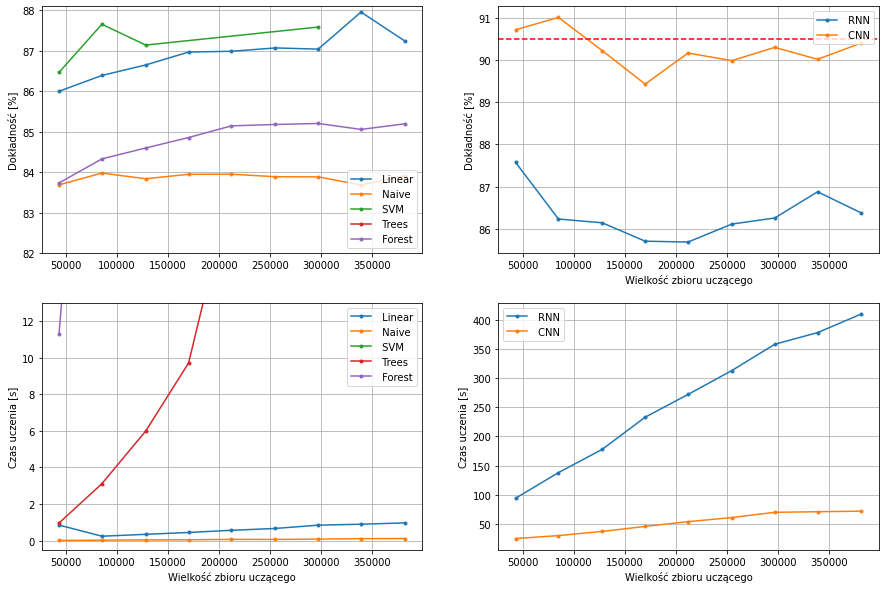

In [48]:
plt.rcParams['figure.figsize'] = [15, 10]
f, axs = plt.subplots(2, 2)

axs[0,0].plot(size_table['training_size'],size_table['Ridge_a'], label=' Linear',marker= '.')
axs[0,0].plot(size_table['training_size'],size_table['Naive_a'], label=' Naive',marker= '.')
axs[0,0].plot(svm['training_size'],svm['SVM_a'], label=' SVM',marker= '.')
axs[0,0].plot(size_table['training_size'],size_table['DT_a'], label=' Trees',marker= '.')
axs[0,0].plot(size_table['training_size'],size_table['RF_a'], label=' Forest',marker= '.')
#axs[0].plot(size_table['training_size'],size_table['RNN_a'], label=' RNN',marker= '.')
#axs[0].plot(size_table['training_size'],size_table['CNN_a'], label=' CNN',marker= '.')
#axs[0].set_title('Binary accuracy for Text Classification')
axs[0,0].set_ylabel('Dokładność [%]')
#axs[0,0].set_xlabel('No. epoch')
axs[0,0].legend(loc="lower right")
axs[0,0].grid(True)
axs[0,0].set_ylim(82,88.1)

axs[0,1].plot(size_table['training_size'],size_table['RNN_a'], label=' RNN',marker= '.')
axs[0,1].plot(size_table['training_size'],size_table['CNN_a'], label=' CNN',marker= '.')
axs[0,1].axhline(y=90.5, color='red', ls='--')
#axs[0,1].axhline(y=89, color='yellow', ls='--')
axs[0,1].set_ylabel('Dokładność [%]')
axs[0,1].set_xlabel('Wielkość zbioru uczącego')
axs[0,1].legend(loc="upper right")
axs[0,1].grid(True)

axs[1,0].plot(size_table['training_size'],size_table['Ridge_t'], label=' Linear',marker= '.')
axs[1,0].plot(size_table['training_size'],size_table['Naive_t'], label=' Naive',marker= '.')
axs[1,0].plot(svm['training_size'],svm['SVM_t'], label=' SVM',marker= '.')
axs[1,0].plot(size_table['training_size'],size_table['DT_t'], label=' Trees',marker= '.')
axs[1,0].plot(size_table['training_size'],size_table['RF_t'], label=' Forest',marker= '.')
axs[1,0].set_ylabel('Czas uczenia [s]')
axs[1,0].set_xlabel('Wielkość zbioru uczącego')
axs[1,0].legend(loc="upper right")
axs[1,0].grid(True)
axs[1,0].set_ylim(-0.50,13)


axs[1,1].plot(size_table['training_size'],size_table['RNN_t'], label=' RNN',marker= '.')
axs[1,1].plot(size_table['training_size'],size_table['CNN_t'], label=' CNN',marker= '.')
axs[1,1].set_ylabel('Czas uczenia [s]')
axs[1,1].set_xlabel('Wielkość zbioru uczącego')
axs[1,1].legend(loc="upper left")
axs[1,1].grid(True)

In [21]:
size_table

,stage,training_size,testing_size,Ridge_a,Ridge_t,Naive_a,Naive_t,SVM_a,SVM_t,DT_a,DT_t,RF_a,RF_t,RNN_a,RNN_t,CNN_a,CNN_t
0,size,43000,128000,11.700,0.85118,83.690,0.0120,86.4652,307.0,72.470,0.963,83.737,11.3,87.575,94,90.722,25.0
1,size,85000,128000,86.390,0.24200,83.980,0.0257,87.6540,1073.0,72.200,3.110,84.330,39.5,86.229,138,91.015,30.1
2,size,128000,128000,86.650,0.34600,83.840,0.0410,87.1407,2236.0,72.780,5.990,84.600,102.0,86.139,178,90.227,37.3
3,size,170000,128000,86.968,0.44700,83.950,0.0480,0.0000,4058.0,72.830,9.710,84.858,205.0,85.703,233,89.432,45.8
4,size,212000,128000,86.987,0.56600,83.953,0.0698,0.0000,0.0,73.475,19.400,85.146,494.0,85.682,272,90.169,54.0
5,size,255000,128000,87.070,0.66600,83.890,0.0658,0.0000,0.0,73.076,18.600,85.180,513.0,86.109,313,89.989,61.0
6,size,297000,128000,87.040,0.84700,83.887,0.0840,87.5848,11371.0,73.555,25.200,85.205,775.0,86.253,358,90.304,70.0
7,size,339000,85000,87.955,0.89700,83.686,0.1100,0.0000,0.0,73.366,30.600,85.058,887.0,86.875,378,90.021,71.0
8,size,382000,43000,87.240,0.97100,83.914,0.1140,0.0000,0.0,74.100,34.600,85.197,1168.0,86.372,410,90.408,72.0
